HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

HtmlProgressBar cannot be displayed. Please use the TerminalProgressBar. It can be enabled with `nengo.rc['progress']['progress_bar'] = 'nengo.utils.progress.TerminalProgressBar'`.

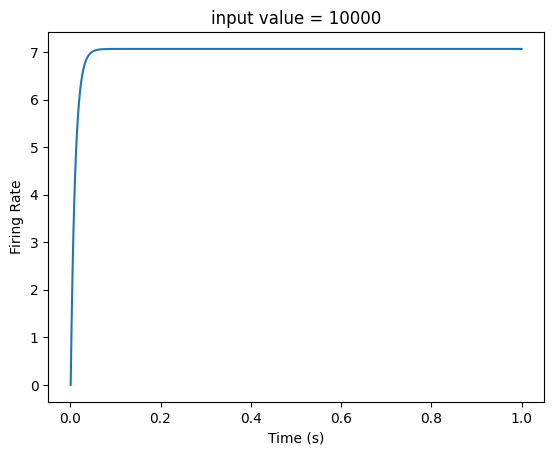

In [95]:
import os
import nengo
import nengo_loihi

outdir = "./inputSpike"
os.makedirs(outdir, exist_ok=True)

# Define the input value (position)
position = 10000
max_rate = 120
amp = 1/max_rate

# Create a model
with nengo.Network() as model:
    # Create a single neuron ensemble with LIF neurons to encode position
    nengo_loihi.add_params(model)
    model.config[nengo.Ensemble].max_rates = nengo.dists.Choice([max_rate])
    model.config[nengo.Ensemble].intercepts = nengo.dists.Choice([0])
    model.config[nengo.Connection].synapse = None
    neuron_type = nengo.LIF(tau_rc=0.02, tau_ref=0.001, amplitude=amp)
    model.config[nengo.Ensemble].neuron_type = neuron_type
    position_ensemble = nengo.Ensemble(n_neurons=1, dimensions=1)

    # Provide input to the ensemble representing the position
    input_node = nengo.Node(output=position)
    nengo.Connection(input_node, position_ensemble)

    # Probe the output of the ensemble
    position_probe = nengo.Probe(position_ensemble, synapse=0.01)

# Create a NengoLoihi Simulator
with nengo.Simulator(model) as sim:
    # Run simulation
    sim.run(1)

# Plot the results
import matplotlib.pyplot as plt
plt.plot(sim.trange(), sim.data[position_probe])
plt.xlabel('Time (s)')
plt.ylabel('Firing Rate')
plt.title('input value = '+ str(position))

plt.savefig(outdir+'/inputValue'+str(position)+".pdf")
plt.savefig(outdir+'/inputValue'+str(position)+".png")

plt.show()